In [1]:
# Python 2 / 3 comp
from __future__ import print_function, division

# Standard imports to work with datasets, plots, etc.
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import requests
import urllib2
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.interpolate import *

#loading rcParams from JSON template (created from Federica's fbb_matplotlibrc.json)
url = 'https://s3.amazonaws.com/sb-public/sbg389_matplotlibrc.json'
resp = requests.get(url=url)
data = json.loads(resp.text)
pl.rcParams.update(data)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['griddata', 'insert', 'polyint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Using a dataset containing the GDP in local currencies from 1960 to 2016
# Filtering the data to select only Uruguay
dfGdp = pd.read_csv('https://github.com/datasets/gdp/raw/master/data/gdp.csv')
dfGdp = dfGdp[(dfGdp['Country Name'] == 'Uruguay')]
dfGdp.head()

# Will plot the GDP as the dependent variable (y) and year as the independente (x)
# Aditionally, I will fit a line and a curve using OLS

# Lets predict
y = dfGdp.Value  # response
X = dfGdp.Year  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

# use the sm OLS method passing the y (existing data for what I want to predict) and the predictor X
est = (sm.OLS(y, X))

# run the fit method
est = est.fit()
est.summary()

# Pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.Year.min(), X.Year.max(), 40)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

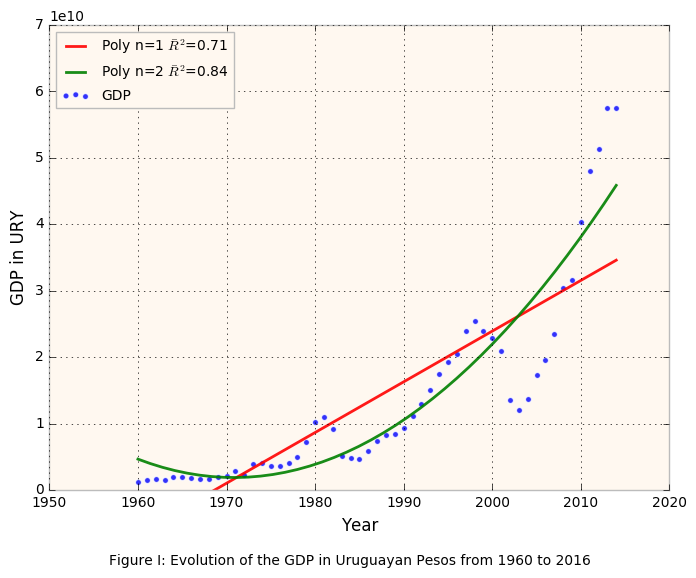

In [49]:
pl.figure(figsize=(8, 6))
pl.xlabel("Year")
pl.ylabel("GDP in URY")
pl.ylim(0,7e10)

# Plot GDP
pl.scatter(dfGdp.Year, dfGdp.Value,  s=20, alpha=0.8,label='GDP' )

# Plot first degree Polynomial
pl.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9, label='Poly n=1 $\\bar R^2$=%.2f' % est.rsquared_adj)


# Fitting second degree Polynomial
x = pd.DataFrame({'Year': np.linspace(dfGdp.Year.min(), dfGdp.Year.max(), 40)})

# 2-nd order polynomial
poly_2 = smf.ols(formula='Value ~ 1 + Year + I(Year ** 2.0)', data=dfGdp).fit()

pl.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $\\bar R^2$=%.2f' % poly_2.rsquared_adj, 
         alpha=0.9)

pl.legend(loc='upper left')

figtext(0.2,-.00001,"Figure I: Evolution of the GDP in Uruguayan Pesos from 1960 to 2016")